In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec # GRIDSPEC !

plt.rcParams['axes.formatter.useoffset'] = False

In [2]:
dir_base = str("/home/ubuntu/Desktop/lab2/WASP-44/WASP-44-b/")
dir_plot = str("/WASP44_TESS/emcee_plot/model_files/")

# This is the name of the folder where emcee and emcee_plot are stored, 
# it's the same of the configuration file but without the .yaml extension
dir_mods = str('TESS_analysis')

# This name will be used to store all your 
filename = 'WASP44_TESS_plot'


planet_list = ['b']
transit_time = 2458386.578204  # From TESS analysis
period = 2.423846         # From TESS analysis


In [3]:
def plot_2_panels():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html
    
    gs = gridspec.GridSpec(2,1, height_ratios=[3.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1], sharex=ax_0)

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False, style='plain')
    ax_1.ticklabel_format(useOffset=False, style='plain')
    return ax_0, ax_1


def plot_3_panels():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html
    
    gs = gridspec.GridSpec(3,1, height_ratios=[2.0,2.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1], sharex=ax_0)
    ax_2 = plt.subplot(gs[2], sharex=ax_0)

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)
    ax_2.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False, style='plain')
    ax_1.ticklabel_format(useOffset=False, style='plain')
    ax_2.ticklabel_format(useOffset=False, style='plain')
    return ax_0, ax_1, ax_2

<IPython.core.display.Javascript object>


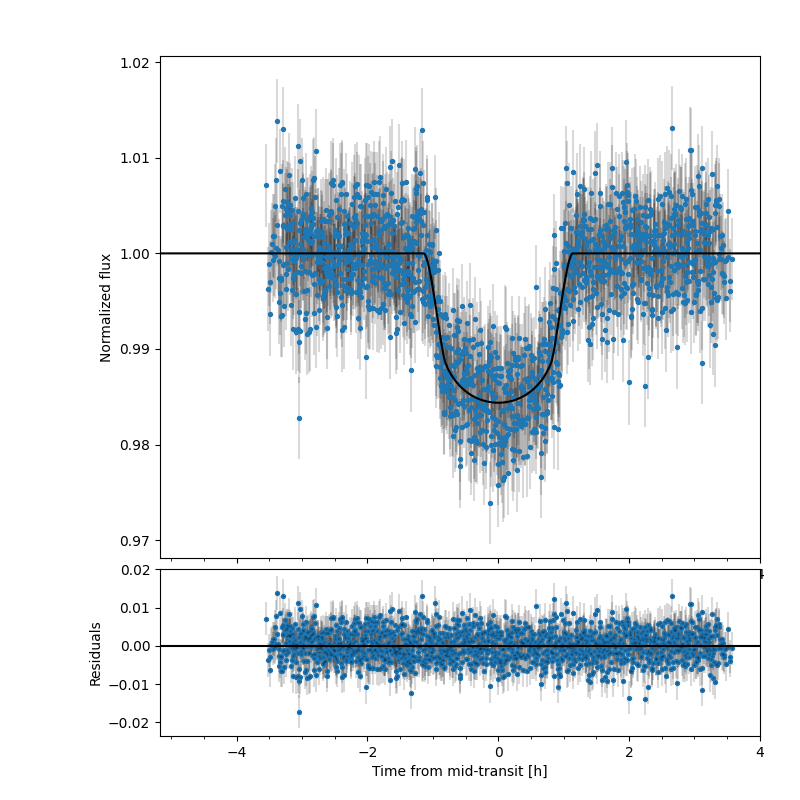

In [4]:
data_plot = np.genfromtxt(dir_base + dir_mods + dir_plot  + 'LCdata_lc_model_b.dat', skip_header=1)


#    "phase = (time - epoch_bls) % period_bls / period_bls\n",
#    "phase[np.where(phase>0.5)] -= 1 \n",

phase_hours = data_plot[:,1] * 24
jitter = data_plot[:,12]
obs_val = data_plot[:,3]
obs_err = np.sqrt(data_plot[:,4]**2 + jitter**2)
res_val = data_plot[:,10]
res_err = np.sqrt(data_plot[:,11]**2 + jitter**2)



data_model = np.genfromtxt(dir_base + dir_mods + dir_plot +'LCdata_lc_model_b_oversampled.dat', skip_header=1)

model_phase_hours = data_model[:,0]* 24
model_full = data_model[:,1] + 1.

fig = plt.figure(1, figsize=(8,8))
ax_0, ax_1 = plot_2_panels()


ax_0.errorbar(phase_hours, obs_val, yerr=obs_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_0.scatter(phase_hours, obs_val , c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

ax_0.plot(model_phase_hours,model_full, color='k', linestyle='-', zorder=2)


ax_1.errorbar(phase_hours, res_val, yerr=res_err, color='black', markersize=1, alpha=0.15, fmt='o', zorder=1)
ax_1.scatter(phase_hours, res_val, c='C0', s=8, zorder=1)


#ax_0.legend( loc='lower left', fontsize='medium')



ax_1.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.99957,1.00029)
#ax_1.set_ylim(-0.00026,0.00026)
ax_0.set_ylabel('Normalized flux')
ax_1.set_xlabel('Time from mid-transit [h]')
ax_1.set_ylabel('Residuals')


plt.savefig(filename+'_TESS_check.pdf', dpi=300, bbox_inches='tight')

